In [12]:
import pandas as pd
import numpy as np
import folium

In [2]:
!wget -q -O 'New_Taipei'  https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx
print('Download complete /n')


Download complete /n


In [2]:
columns_name = ['No','Date', 'House Age', 'Distance to MRT Station', 'No of Convenience Stores', 'Latitude', 'Longitude', 'Price per unit area']
taipei_df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx", names = columns_name)
taipei_df = taipei_df.drop(['No'], axis=1)
#print(taipei_df.describe())
taipei_df = taipei_df.sort_values('Date')
taipei_df = taipei_df.reset_index()
taipei_df = taipei_df.drop(['index'], axis=1)

taipei_df['Date'] = round(taipei_df['Date'],3)
taipei_df.head()

,Date,House Age,Distance to MRT Station,No of Convenience Stores,Latitude,Longitude,Price per unit area
0,2012.667,12.6,383.2805,7,24.96735,121.54464,42.5
1,2012.667,33.4,186.9686,6,24.96604,121.54211,42.2
2,2012.667,29.1,506.1144,4,24.97845,121.53889,40.3
3,2012.667,15.6,289.3248,5,24.98203,121.54348,46.1
4,2012.667,34.9,179.4538,8,24.97349,121.54245,39.7


In [3]:
i = 0

for i in range(len(taipei_df['Date'])):
    date_string = str(taipei_df.iloc[i,0])
    date_year = date_string[0:4]
    date_month = date_string[5]
    date_month = int(date_month)+1
    date_month = str(date_month)
    time = date_month + '/' + date_year 
    #print(time)
    taipei_df.iloc[i,0] = time

print(time)
#taipei_df['Date'] = time
taipei_df.head()

6/2013


,Date,House Age,Distance to MRT Station,No of Convenience Stores,Latitude,Longitude,Price per unit area
0,7/2012,12.6,383.2805,7,24.96735,121.54464,42.5
1,7/2012,33.4,186.9686,6,24.96604,121.54211,42.2
2,7/2012,29.1,506.1144,4,24.97845,121.53889,40.3
3,7/2012,15.6,289.3248,5,24.98203,121.54348,46.1
4,7/2012,34.9,179.4538,8,24.97349,121.54245,39.7


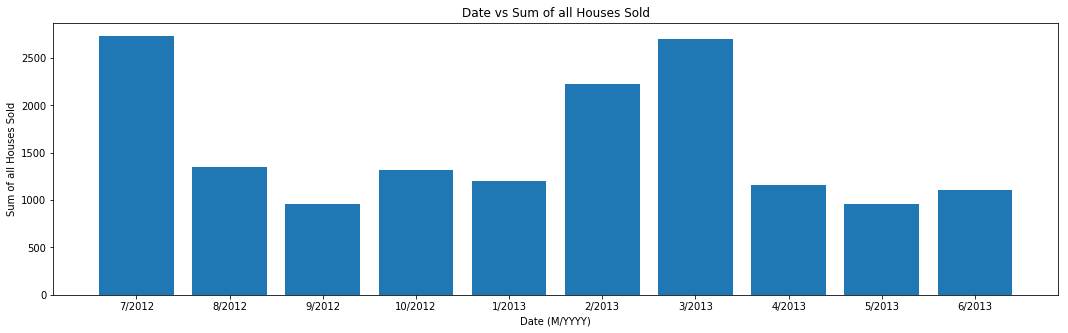

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
x = taipei_df['Date'].unique().tolist()
y = (taipei_df.groupby('Date')['Price per unit area'].agg(np.sum)).tolist()

#taipei_df.plot(kind = 'bar', x = taipei_df['Date'].unique(), y=taipei_df.groupby('Date')['Price per unit area'].agg(np.sum))
fig = plt.figure(figsize=(18,5))
plt.bar(x, y)
plt.xlabel('Date (M/YYYY)')
plt.ylabel('Sum of all Houses Sold')
plt.title('Date vs Sum of all Houses Sold')
plt.show()

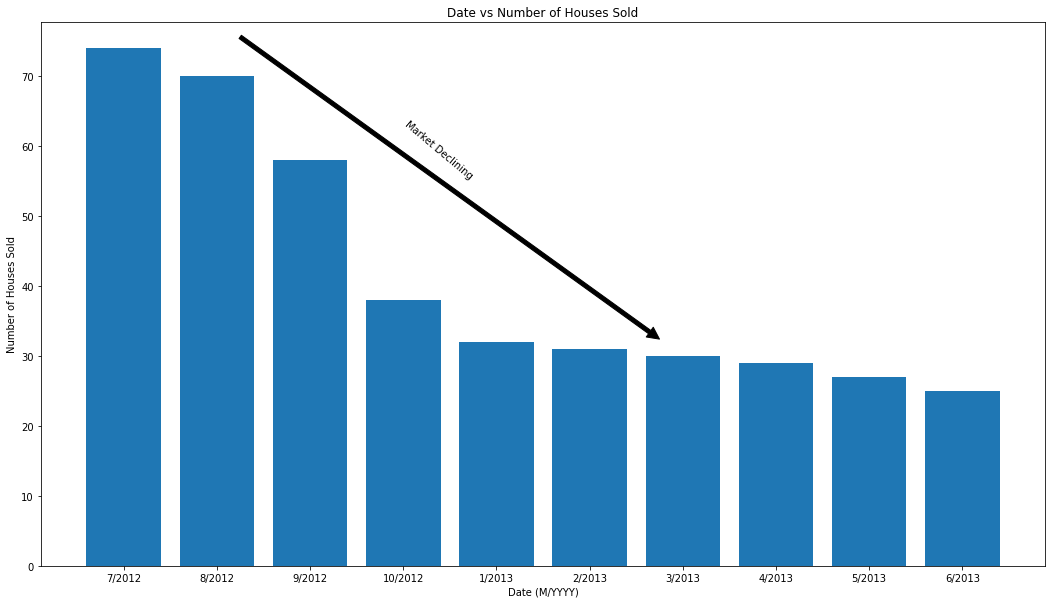

In [5]:
x = taipei_df['Date'].unique().tolist()
y = taipei_df['Date'].value_counts()


#taipei_df.plot(kind = 'bar', x = taipei_df['Date'].unique(), y=taipei_df.groupby('Date')['Price per unit area'].agg(np.sum))
fig = plt.figure(figsize=(18,10))
plt.annotate('', xy = (6,30), xytext = (1,78), xycoords = 'data', arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Market Declining', # text to display
             xy=(3,55),                    # start the text at at point (year 2008 , pop 30)
             rotation=320,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )
plt.bar(x, y)
plt.xlabel('Date (M/YYYY)')
plt.ylabel('Number of Houses Sold')
plt.title('Date vs Number of Houses Sold')
plt.show()



Coefficients:  [[-0.27125385]]
Intercept:  [42.32689655]
Mean absolute error: 10.97
Residual sum of squares (MSE): 208.94
R2-score: -22.51
No correlation between the age of a house and the selling price


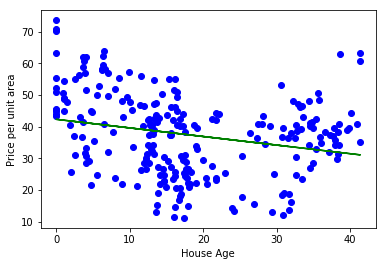

In [6]:
X = np.asarray(taipei_df[['House Age']])
y = np.asarray(taipei_df[['Price per unit area']])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 4)

from sklearn import linear_model as lm
regr = lm.LinearRegression()
regr.fit(X_train, y_train)
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regr.coef_[0][0]*X_train + regr.intercept_[0], '-g')
plt.xlabel('House Age')
plt.ylabel('Price per unit area')

from sklearn.metrics import r2_score
y_test_pred = regr.predict(X_test) 
print('Mean absolute error: %.2f' % np.mean(np.absolute(y_test_pred - y_test)))
print('Residual sum of squares (MSE): %.2f' % np.mean((y_test_pred - y_test)**2))
print("R2-score: %.2f" % r2_score(y_test_pred, y_test))

if r2_score(y_test_pred, y_test) < 0:
    print('No correlation between the age of a house and the selling price')

else:
    print('Correlation between the age of a house and the selling price')

Coefficients:  [[2.61120574]]
Intercept:  [26.97551563]
Mean absolute error: 8.71
Residual sum of squares (MSE): 154.82
R2-score: -1.76
No correlation between the number of Convenience Stores and the selling price


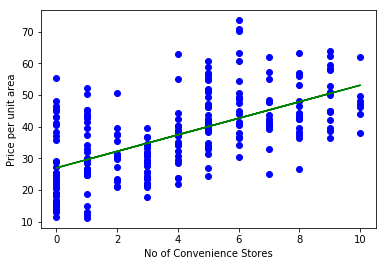

In [24]:
X = np.asarray(taipei_df[['No of Convenience Stores']])
y = np.asarray(taipei_df[['Price per unit area']])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 4)

from sklearn import linear_model as lm
regr = lm.LinearRegression()
regr.fit(X_train, y_train)
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regr.coef_[0][0]*X_train + regr.intercept_[0], '-g')
plt.xlabel('No of Convenience Stores')
plt.ylabel('Price per unit area')

from sklearn.metrics import r2_score
y_test_pred = regr.predict(X_test) 
print('Mean absolute error: %.2f' % np.mean(np.absolute(y_test_pred - y_test)))
print('Residual sum of squares (MSE): %.2f' % np.mean((y_test_pred - y_test)**2))
print("R2-score: %.2f" % r2_score(y_test_pred, y_test))

if r2_score(y_test_pred, y_test) < 0:
    print('No correlation between the number of Convenience Stores and the selling price')

else:
    print('Correlation between the number of Convenience Stores and the selling price')

Coefficients:  [[-0.00680654]]
Intercept:  [45.12775319]
Mean absolute error: 7.46
Residual sum of squares (MSE): 123.78
R2-score: -0.89
Correlation between the distance to MRT Station and the selling price


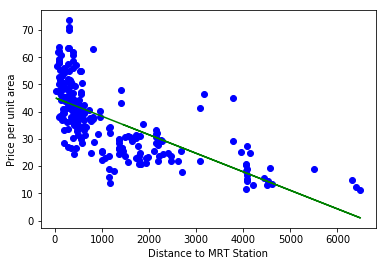

In [10]:
X = np.asarray(taipei_df[['Distance to MRT Station']])
y = np.asarray(taipei_df[['Price per unit area']])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 4)

from sklearn import linear_model as lm
regr = lm.LinearRegression()
regr.fit(X_train, y_train)
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regr.coef_[0][0]*X_train + regr.intercept_[0], '-g')
plt.xlabel('Distance to MRT Station')
plt.ylabel('Price per unit area')

from sklearn.metrics import r2_score
y_test_pred = regr.predict(X_test) 
print('Mean absolute error: %.2f' % np.mean(np.absolute(y_test_pred - y_test)))
print('Residual sum of squares (MSE): %.2f' % np.mean((y_test_pred - y_test)**2))
print("R2-score: %.2f" % r2_score(y_test_pred, y_test))

if r2_score(y_test_pred, y_test) < -1:
    print('No correlation between the distance to MRT Station and the selling price')

else:
    print('Correlation between the distance to MRT Station and the selling price')

In [23]:
#Latitude = taipei_df['Latitude']
#Longitude = taipei_df['Longitude']
map_taipei = folium.Map(zoom_start = 500, tiles = 'Stamen Toner')

for lng, lat in zip(taipei_df['Longitude'], taipei_df['Latitude']):
   folium.CircleMarker(
   [lat, lng],
   radius = 5,
   color = 'blue',
   fill = True,
   fill_color = '#3186cc',
   fill_opacity = 0.7,
    parse_html = False).add_to(map_taipei)

map_taipei